# Conservation plots

## Preliminaries

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

## Stratify by region

### Load and clean data

In [2]:
# Combine phylop statistics across all regions and constraint annotations
## All regions
a = pd.read_csv("../outputs/phylop_stats_region.tsv", sep="\t").assign(constraint="all")
## Constrained or unconstrained regions
b = pd.read_csv("../outputs/phylop_stats_region_constraint.tsv", sep="\t")
## Merge
df = pd.concat([a, b])

# Drop start proximal sites
df = df[df["region"] != "start_proximal"]

# Order and name the region and constraint variables
region_order = ["transcript", "nmd_target", "long_exon", "distal_nmd"]
region_labels = ["Full transcript", "NMD target", "Long exon", "Distal"]
constraint_order = ["all", "constrained", "unconstrained"]
constraint_labels = ["All", "Constrained", "Unconstrained"]

# Reorder the data as per above
df["region"] = pd.Categorical(df["region"], categories=region_order, ordered=True)
df = df.sort_values("region")

# Subset the data for plotting
_all = df[df["constraint"] == "all"]
cons = df[df["constraint"] == "constrained"]
nonc = df[df["constraint"] == "unconstrained"]

In [3]:
col = sns.color_palette("colorblind").as_hex()
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Vertical bar plot

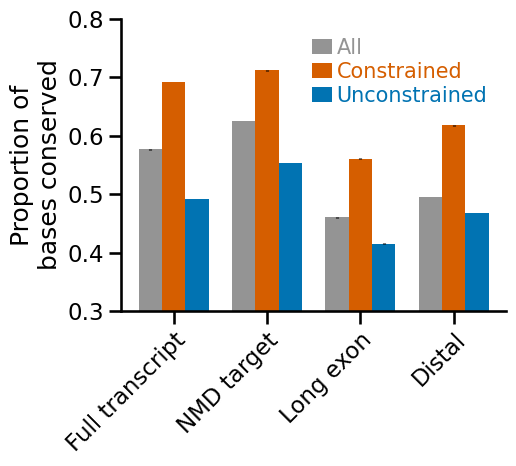

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5), layout="tight")

x = np.arange(len(_all))
w = 0.25

_i = [0, 1, 2]
_h = [x["fracCdsCons"] for x in [_all, cons, nonc]]
_y_err = [x["ci95"] for x in [_all, cons, nonc]]
_c = [col[-3], col[3], col[0]]

for i, h, y, c, l in zip(_i, _h, _y_err, _c, constraint_labels):
    ax.bar(x=x + w * i, width=w, height=h, yerr=y, color=c, label=l)

ax.set_ylabel("Proportion of\nbases conserved")
ax.set_ylim((0.3, 0.8))
ax.set_xticks(
    ticks=x + w, labels=region_labels, rotation=45, ha="right", rotation_mode="anchor"
)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(
    labelcolor="linecolor",
    fontsize="small",
    frameon=False,
    handlelength=1,
    handletextpad=0.2,
    labelspacing=0.2,
    ncols=1,
)

plt.savefig("../plots/phylop_region_constraint.svg", format="svg")

## Horizontal bar plot

In [5]:
# Reorder the data
df = df.sort_values("region", ascending=False)

# Refresh the subsets
_all = df[df["constraint"] == "all"]
cons = df[df["constraint"] == "constrained"]
nonc = df[df["constraint"] == "unconstrained"]

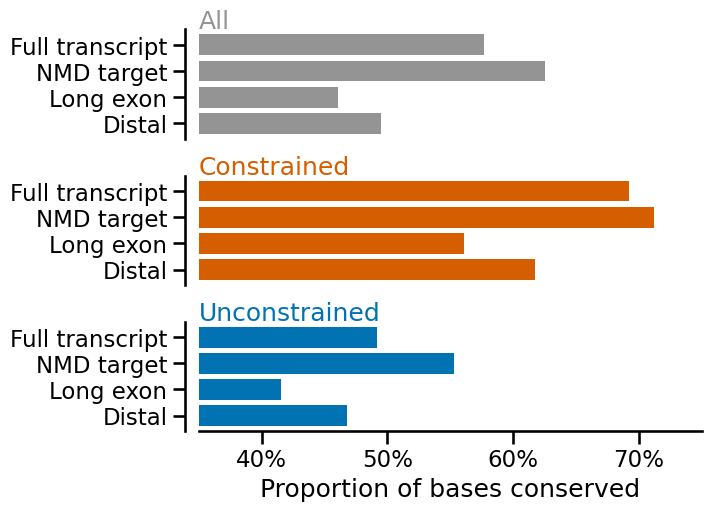

In [6]:
fig, axs = plt.subplots(
    3, 1, figsize=(7, 5), layout="constrained", gridspec_kw={"hspace": 0.1}
)

n = len(_all)
y = np.arange(n)

_x = [x["fracCdsCons"] for x in [_all, cons, nonc]]
_xerr = [x["ci95"] for x in [_all, cons, nonc]]
_c = [col[-3], col[3], col[0]]

for ax, x, xerr, c, l in zip(axs, _x, _xerr, _c, constraint_labels):
    bars = ax.barh(
        y=y * 1 / n, height=1 / (n + 1), width=x, color=c, label=l
    )
    # y ticks have reversed label order (hbar plots low to high)
    ax.set_yticks(ticks=y * 1 / n, labels=reversed(region_labels))
    ax.set_xlim((0.35, 0.75))
    ax.spines["left"].set_position(("outward", 10))
    # ax.spines["left"].set_visible(False)
    # ax.bar_label(bars, fmt="%.2g", color=c, padding=5)
    ax.text(
        0.35,
        0.86,
        s=l,
        color=c,
        horizontalalignment="left",
        verticalalignment="bottom",
    )

for ax in [axs[0], axs[1]]:
    ax.set_xticks([])
    ax.spines[["top", "bottom", "right"]].set_visible(False)

axs[2].set_xticks([0.4, 0.5, 0.6, 0.7], ["40%", "50%", "60%", "70%"])
axs[2].set_xlabel("Proportion of bases conserved")
axs[2].spines[["top", "right"]].set_visible(False)

plt.savefig("../plots/phylop_region_constraint_horizontal.svg", format="svg")